In [4]:
# examine the monthly mean spatial distribution of analysis increment, and rms
# initial built: 2024/05/31
# modified: 2024/06/03 - includes with/without BC verification
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

0.21.1


In [218]:
avg_period = '2022062000_2022072000'
expids     = ['CTRL','CTRL_no_situ']
exptest    = 'CTRL_no_situ'
expref     = 'CTRL'
instr      = 'atms'
channel    = '22'
meshsize   = '5.0'

In [224]:
omf={}; oma={};
varbc='omfnbc' # omf (with BC) or omfnbc (without BC)

savefig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/rad_meshplot/{instr}/ch{channel}/'

if varbc == 'omfnbc':
    bc_txt = 'noBC'
else:
    bc_txt = ''
    
for exp in expids:
    path_dir   = f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/gsidiag/ush/radstats/data/meshmean/{avg_period}/{exp}/mesh{meshsize}/'
    fn = path_dir + f'meshmean_ges_{varbc}_{instr}_{channel}_{exp}.npz'
    omf[exp] = np.load(fn)
    
    fn = path_dir + f'meshmean_anl_{varbc}_{instr}_{channel}_{exp}.npz'
    oma[exp] = np.load(fn)

In [225]:
# setup the grid
dx = float(meshsize)
lon = np.arange(0.0+dx*0.5, 360.0+dx*0.5, dx)
lat = np.arange(-90.0+dx*0.5, 90.0+dx*0.5, dx)
lons, lats = np.meshgrid(lon,lat)

In [226]:
# colorscale parameters:
savefig = True

if instr == 'atms':
    if channel in ('16'):
        min_data = 500; val_max  = 2.5;  diff_max = 1.0;    ana_inc_max = 0.7;  rms_max  = 9;    rmsdiff_max = 1.0
    elif channel in ('17'):
        min_data = 500; val_max  = 1.0;  diff_max = 0.6;    ana_inc_max = 0.4;  rms_max  = 13;   rmsdiff_max = 0.5
    elif channel in ('18'):
        min_data = 500; val_max  = 1.0;  diff_max = 0.30;   ana_inc_max = 0.30; rms_max  = 11;   rmsdiff_max = 0.25
    elif channel in ('19'):
        min_data = 500; val_max  = 1.5;  diff_max = 0.20;   ana_inc_max = 0.20; rms_max  = 8.5;  rmsdiff_max = 0.20   
    elif channel in ('20'):
        min_data = 500; val_max  = 1.5;  diff_max = 0.20;   ana_inc_max = 0.20; rms_max  = 6.5;  rmsdiff_max = 0.20
    elif channel in ('21'):
        min_data = 500; val_max  = 1.5;  diff_max = 0.20;   ana_inc_max = 0.20; rms_max  = 4.5;  rmsdiff_max = 0.25 
    elif channel in ('22'):
        min_data = 500; val_max  = 1.5;  diff_max = 0.20;   ana_inc_max = 0.30; rms_max  = 4.0;  rmsdiff_max = 0.30     
        
        
elif instr == 'amsua':
    if channel in ('1'):
        min_data = 500; val_max  = 1.80;  diff_max = 0.7;  ana_inc_max = 0.7; rms_max  = 7;   rmsdiff_max = 1.0
    elif channel in ('2'):
        min_data = 500; val_max  = 2;    diff_max = 1.6;   ana_inc_max = 0.6; rms_max  = 12;  rmsdiff_max = 1.2
    elif channel in ('3'):
        min_data = 500; val_max  = 1.5;  diff_max = 1.0;   ana_inc_max = 0.6; rms_max  = 6.0;  rmsdiff_max = 0.8
    elif channel in ('4'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.3;  diff_max = 0.12;  ana_inc_max = 0.1; rms_max  = 1.0;  rmsdiff_max = 0.15
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 0.3;  diff_max = 0.12;  ana_inc_max = 0.1; rms_max  = 1.4;  rmsdiff_max = 0.15 
            
    elif channel in ('5'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.15; diff_max = 0.04;  ana_inc_max = 0.04; rms_max  = 0.6;  rmsdiff_max = 0.035
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 0.15; diff_max = 0.04;  ana_inc_max = 0.04; rms_max  = 1.0;  rmsdiff_max = 0.035        

    elif channel in ('6'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.15; diff_max = 0.02;  ana_inc_max = 0.03; rms_max  = 0.30; rmsdiff_max = 0.010
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 0.15; diff_max = 0.02;  ana_inc_max = 0.03; rms_max  = 1.50; rmsdiff_max = 0.015 

    elif channel in ('7'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.12; diff_max = 0.005;   ana_inc_max = 0.02; rms_max  = 0.25; rmsdiff_max = 0.003
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 0.12; diff_max = 0.008;   ana_inc_max = 0.02; rms_max  = 1.60; rmsdiff_max = 0.008 

    elif channel in ('8'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.15; diff_max = 0.007; ana_inc_max = 0.015; rms_max  = 0.25; rmsdiff_max = 0.003
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 0.15; diff_max = 0.007; ana_inc_max = 0.015; rms_max  = 1.00; rmsdiff_max = 0.005
        
    elif channel in ('9'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.15; diff_max = 0.007; ana_inc_max = 0.020; rms_max  = 0.25; rmsdiff_max = 0.006
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 0.15; diff_max = 0.007; ana_inc_max = 0.020; rms_max  = 1.25; rmsdiff_max = 0.006
        
    elif channel in ('10'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.18; diff_max = 0.007; ana_inc_max = 0.020; rms_max  = 0.30; rmsdiff_max = 0.004
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 0.18; diff_max = 0.007; ana_inc_max = 0.020; rms_max  = 1.40; rmsdiff_max = 0.004

    elif channel in ('11'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.30; diff_max = 0.010; ana_inc_max = 0.020;  rms_max  = 0.50; rmsdiff_max = 0.006
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 0.30; diff_max = 0.010; ana_inc_max = 0.020;  rms_max  = 1.25; rmsdiff_max = 0.008
        
    elif channel in ('12'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.60; diff_max = 0.015; ana_inc_max = 0.020;  rms_max  = 0.85; rmsdiff_max = 0.010
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 0.60; diff_max = 0.015; ana_inc_max = 0.020;  rms_max  = 1.60; rmsdiff_max = 0.010
        
    elif channel in ('13'):
        if varbc == 'omf':
            min_data = 500; val_max  = 1.00; diff_max = 0.025; ana_inc_max = 0.030;  rms_max  = 1.60; rmsdiff_max = 0.015
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.00; diff_max = 0.025; ana_inc_max = 0.030;  rms_max  = 3.00; rmsdiff_max = 0.015

            
            
    elif channel in ('15'):
        min_data = 500; val_max  = 3.00; diff_max = 1.200; ana_inc_max = 1.200; rms_max  = 9.00; rmsdiff_max = 1.2

In [227]:
# mask out pixels with few data points:
mask={};
for exp in expids:
    mask[exp] = (omf[exp]['ctmesh'] > min_data) & (oma[exp]['ctmesh'] > min_data)

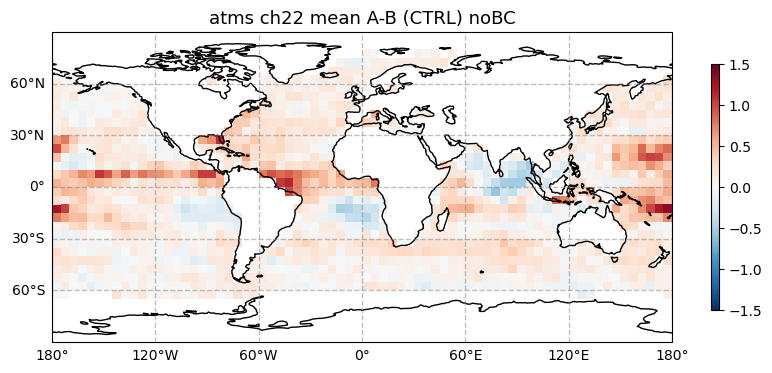

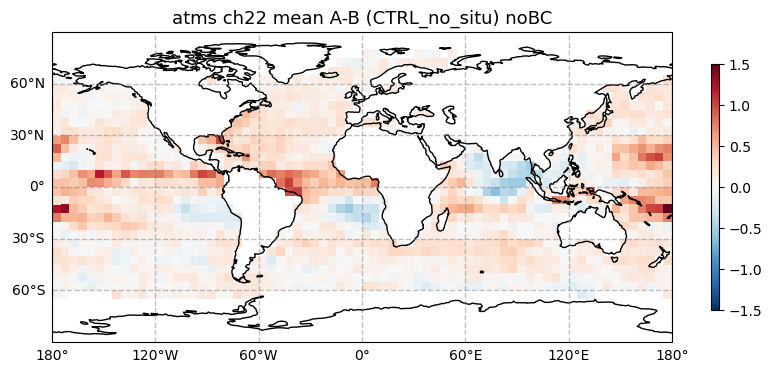

In [182]:
# plot mean analysis increment = amb = (O-B) - (O-A)
for exp in expids:
    pltvar   = omf[exp]['omfmesh'] - oma[exp]['omfmesh']
    pltvar[~mask[exp]] = np.nan

    val_min  = -val_max

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
    ax.coastlines()
    contour1=ax.pcolormesh(lons, lats, pltvar, cmap='RdBu_r', vmin=val_min, vmax=val_max)

    #nan_y, nan_x = np.where(np.isnan(pltvar))
    #ax.scatter(nan_x, nan_y, color='gray', label='NaN values')

    ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
    #ax.set_ylim(-80,80)
    ax.grid(True)
    cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(f'{instr} ch{channel} mean A-B ({exp}) {bc_txt}',fontsize=13)
    if savefig:
        plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_AmB_{bc_txt}_{exp}.png', dpi=200, bbox_inches='tight')



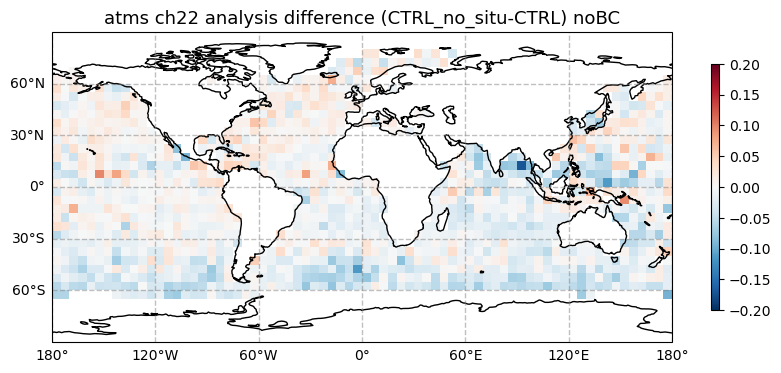

In [183]:
# difference in the analysis (dA)

pltvar = oma[expref]['omfmesh'] - oma[exptest]['omfmesh']
pltvar[~mask[exp]] = np.nan

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
ax.coastlines()
contour1=ax.pcolormesh(lons, lats, pltvar, cmap='RdBu_r', vmin=-diff_max, vmax=diff_max)

ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
#ax.set_ylim(-80,80)
ax.grid(True)
cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'{instr} ch{channel} analysis difference ({exptest}-{expref}) {bc_txt}',fontsize=13)
if savefig:
    plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_dA_{bc_txt}_{exptest}-{expref}.png', dpi=200, bbox_inches='tight')


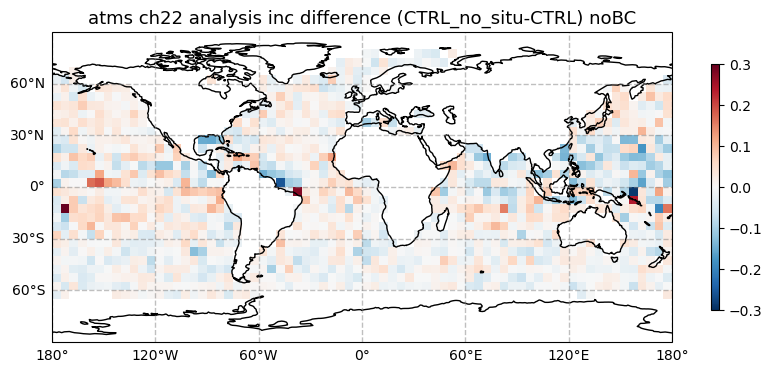

In [184]:
# difference in the analysis increment (dAmB)

pltvar = (omf[exptest]['omfmesh']-oma[exptest]['omfmesh']) - (omf[expref]['omfmesh']-oma[expref]['omfmesh'])
pltvar[~mask[exp]] = np.nan

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
ax.coastlines()
contour1=ax.pcolormesh(lons, lats, pltvar, cmap='RdBu_r', vmin=-ana_inc_max, vmax=ana_inc_max)

ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
#ax.set_ylim(-80,80)
ax.grid(True)
cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'{instr} ch{channel} analysis inc difference ({exptest}-{expref}) {bc_txt}',fontsize=13)
if savefig:
    plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_dAmB_{bc_txt}_{exptest}-{expref}.png', dpi=200, bbox_inches='tight')


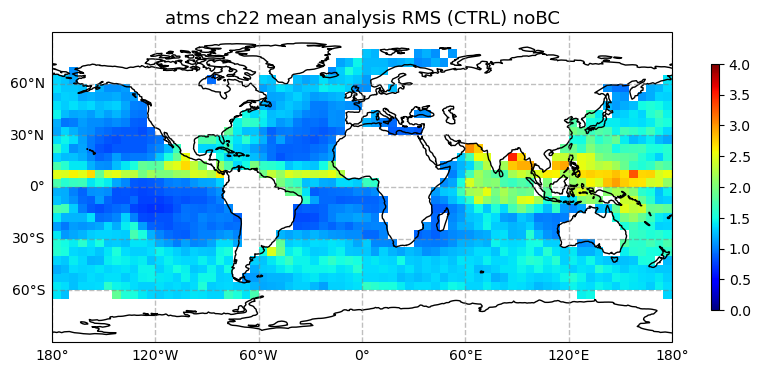

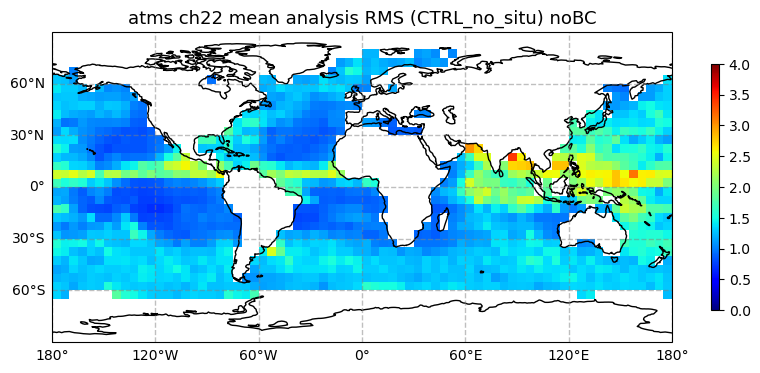

In [228]:
# plot mean rms of O-A
for exp in expids:
    pltvar   = oma[exp]['rmsmesh']
    pltvar[~mask[exp]] = np.nan

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
    ax.coastlines()
    contour1=ax.pcolormesh(lons, lats, pltvar, cmap='jet', vmin=0, vmax=rms_max)

    ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
    #ax.set_ylim(-80,80)
    ax.grid(True)
    cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(f'{instr} ch{channel} mean analysis RMS ({exp}) {bc_txt}',fontsize=13)
    
    if savefig:
        plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_RMS_analysis_{bc_txt}_{exp}.png', dpi=200, bbox_inches='tight')

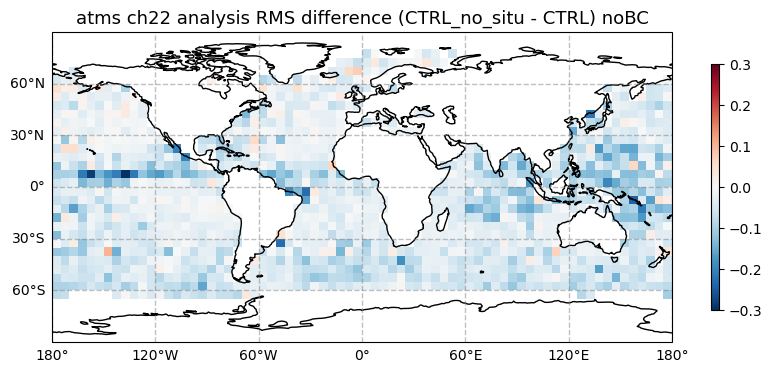

In [186]:
# difference in the rms plot

pltvar = oma[exptest]['rmsmesh'] - oma[expref]['rmsmesh']
pltvar[~mask[exp]] = np.nan

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
ax.coastlines()
contour1=ax.pcolormesh(lons, lats, pltvar, cmap='RdBu_r', vmin=-rmsdiff_max, vmax=rmsdiff_max)

ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
#ax.set_ylim(-80,80)
ax.grid(True)
cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'{instr} ch{channel} analysis RMS difference ({exptest} - {expref}) {bc_txt}',fontsize=13)

if savefig:
    plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_dRMS_analysis_{bc_txt}_{exptest}-{expref}.png', dpi=200, bbox_inches='tight')